In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import importlib
try:
    importlib.import_module('ultralytics')
    print("Ultralytics is already installed.")
except ImportError:
    print("Installing ultralytics...")
    !pip install ultralytics
    print("Ultralytics installation complete.")

Installing ultralytics...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12

In [ ]:
# Dataset Path
dataset_dir = '/content/drive/My Drive/bisindo_dataset_split'

In [ ]:
import os
import shutil
import random
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from ultralytics import YOLO
from ultralytics.data.dataset import YOLODataset
from torch.utils.data import DataLoader

IMG_SIZE = 224
BATCH_SIZE = 32

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n-cls.pt')

# Train
model.train(
    data=dataset_dir,
    epochs=20,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    patience = 5,
    name="bisindo_yolov8_classification",
    device='cpu'  # or 'cuda' if using GPU
)

100%|██████████| 5.31M/5.31M [00:00<00:00, 42.9MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/bisindo_dataset_split, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bisindo_yolov8_classification, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective

train: Scanning /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/train... 3126 images, 0 corrupt: 100%|██████████| 3126/3126 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.8±0.2 ms, read: 0.1±0.0 MB/s, size: 19.0 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/val... 670 images, 0 corrupt: 100%|██████████| 670/670 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/bisindo_yolov8_classification
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size



       1/20         0G      3.284         32        224:   1%|          | 1/98 [00:20<32:52, 20.34s/it]


100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [03:22<00:00, 18.45s/it]

                   all      0.149      0.499



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:19<00:00,  1.80s/it]

                   all      0.549       0.91

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:18<00:00,  1.72s/it]

                   all      0.761      0.966

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:19<00:00,  1.79s/it]

                   all      0.833      0.985

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it]

                   all      0.867      0.985

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:19<00:00,  1.73s/it]

                   all      0.875      0.987

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:20<00:00,  1.90s/it]

                   all      0.885      0.988

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it]

                   all        0.9      0.987

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:20<00:00,  1.83s/it]

                   all      0.906      0.988

      Epoch    GPU_mem       loss  Instances       Size



      10/20         0G     0.3871         22        224: 100%|██████████| 98/98 [03:45<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:18<00:00,  1.64s/it]

                   all       0.91      0.988

      Epoch    GPU_mem       loss  Instances       Size



      11/20         0G     0.3493         22        224: 100%|██████████| 98/98 [03:41<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:21<00:00,  1.97s/it]

                   all       0.91      0.988

      Epoch    GPU_mem       loss  Instances       Size



      12/20         0G     0.3343         22        224: 100%|██████████| 98/98 [03:45<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it]

                   all      0.907       0.99

      Epoch    GPU_mem       loss  Instances       Size



      13/20         0G     0.3335         22        224: 100%|██████████| 98/98 [03:48<00:00,  2.33s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:19<00:00,  1.77s/it]

                   all      0.916       0.99



      Epoch    GPU_mem       loss  Instances       Size


      14/20         0G     0.3104         22        224: 100%|██████████| 98/98 [03:43<00:00,  2.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:20<00:00,  1.86s/it]

                   all      0.919       0.99

      Epoch    GPU_mem       loss  Instances       Size



      15/20         0G     0.2911         22        224: 100%|██████████| 98/98 [03:43<00:00,  2.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:18<00:00,  1.64s/it]

                   all      0.915      0.988

      Epoch    GPU_mem       loss  Instances       Size



      16/20         0G     0.2879         22        224: 100%|██████████| 98/98 [03:43<00:00,  2.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:18<00:00,  1.70s/it]

                   all      0.927       0.99

      Epoch    GPU_mem       loss  Instances       Size



      17/20         0G     0.2747         22        224: 100%|██████████| 98/98 [03:43<00:00,  2.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:19<00:00,  1.81s/it]

                   all      0.913       0.99

      Epoch    GPU_mem       loss  Instances       Size



      18/20         0G     0.2748         22        224: 100%|██████████| 98/98 [03:42<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:18<00:00,  1.66s/it]

                   all      0.922      0.993

      Epoch    GPU_mem       loss  Instances       Size



      19/20         0G     0.2729         22        224: 100%|██████████| 98/98 [03:50<00:00,  2.35s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:18<00:00,  1.70s/it]

                   all      0.921      0.991

      Epoch    GPU_mem       loss  Instances       Size



      20/20         0G      0.256         22        224: 100%|██████████| 98/98 [03:49<00:00,  2.34s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:22<00:00,  2.08s/it]

                   all      0.924      0.993

20 epochs completed in 1.673 hours.


Optimizer stripped from runs/classify/bisindo_yolov8_classification/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/bisindo_yolov8_classification/weights/best.pt, 3.0MB

Validating runs/classify/bisindo_yolov8_classification/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,468,186 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/train... found 3126 images in 26 classes ✅ 
val: /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/val... found 670 images in 26 classes ✅ 
test: /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/test... found 670 images in 26 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:18<00:00,  1.67s/it]


                   all      0.922      0.993
Speed: 0.0ms preprocess, 16.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/bisindo_yolov8_classification


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7adaa24d50>
curves: []
curves_results: []
fitness: 0.9574626982212067
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9223880767822266, 'metrics/accuracy_top5': 0.9925373196601868, 'fitness': 0.9574626982212067}
save_dir: PosixPath('runs/classify/bisindo_yolov8_classification')
speed: {'preprocess': 0.000497843286293166, 'inference': 16.571666491044972, 'loss': 3.285373005287986e-05, 'postprocess': 8.456268888175376e-05}
task: 'classify'
top1: 0.9223880767822266
top5: 0.9925373196601868

In [ ]:
# Validate the model on the test set
metrics = model.val(split='test')
print(metrics)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,468,186 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/train... found 3126 images in 26 classes ✅ 
val: /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/val... found 670 images in 26 classes ✅ 
test: /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/test... found 670 images in 26 classes ✅ 
test: Fast image access ✅ (ping: 0.9±0.3 ms, read: 0.1±0.0 MB/s, size: 18.8 KB)


test: Scanning /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/test... 670 images, 0 corrupt: 100%|██████████| 670/670 [03:36<00:00,  3.09it/s]


test: New cache created: /content/drive/.shortcut-targets-by-id/1Pcm3OcawO7hbIlRCCnhtgA9wIZJEymAS/bisindo_dataset_split/test.cache


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:16<00:00,  1.25it/s]


                   all      0.925      0.991
Speed: 0.0ms preprocess, 14.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/bisindo_yolov8_classification2
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7acfa04810>
curves: []
curves_results: []
fitness: 0.9582089483737946
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9253731369972229, 'metrics/accuracy_top5': 0.9910447597503662, 'fitness': 0.9582089483737946}
save_dir: PosixPath('runs/classify/bisindo_yolov8_classification2')
speed: {'preprocess': 0.001118492541740016, 'inference': 14.29842612537529, 'loss': 6.266567272259228e-05, 'postprocess': 0.00015846865323116766}
task: 'classify'
top1: 0.9253731369972229
top5: 0.9910447597503662


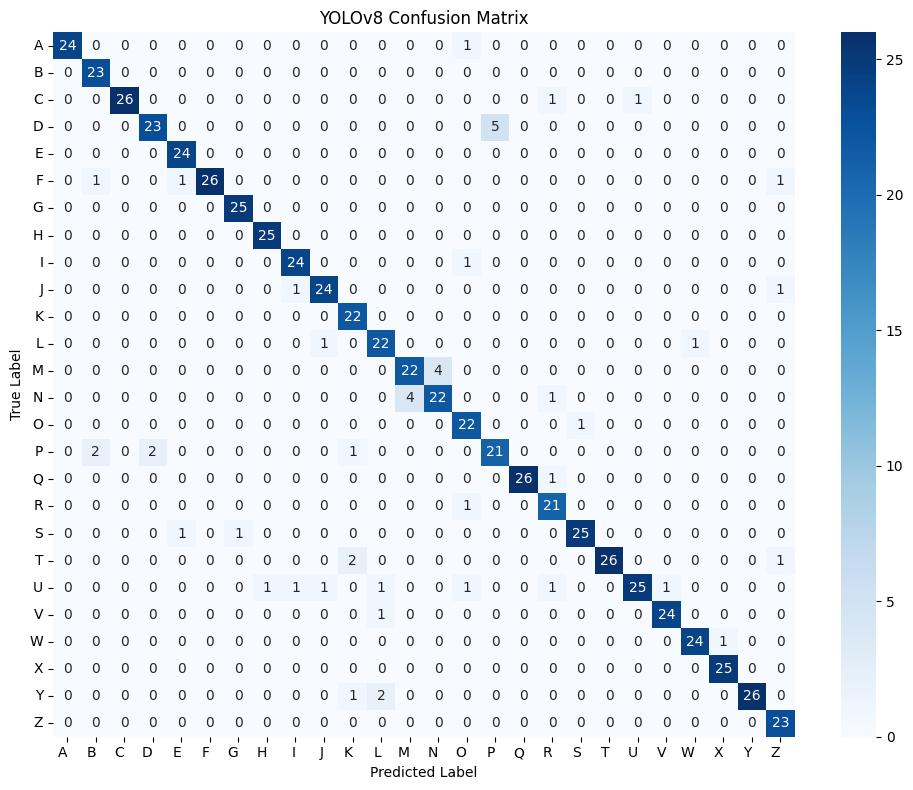

In [ ]:
import torch

# For plotting the heatmap from the confusion matrix object
cm = metrics.confusion_matrix.matrix
class_names = model.names  # list of class names

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=class_names.values(), # Use .values() to get list of names
            yticklabels=class_names.values()) # Use .values() to get list of names
plt.xticks(ha='right')
plt.xlabel('Predicted Label')
plt.yticks(rotation=0)
plt.ylabel('True Label')
plt.title('YOLOv8 Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
import os
from ultralytics import YOLO
from sklearn.metrics import classification_report
from tqdm import tqdm

# Set paths
test_images_dir = '/content/drive/MyDrive/bisindo_dataset_split/test'

# Load model
model = YOLO('runs/classify/bisindo_yolov8_classification/weights/best.pt')

# Get class names from model
class_names_dict = model.names  # e.g., {0: 'A', 1: 'B', ...}
name_to_idx = {v: k for k, v in class_names_dict.items()}  # e.g., {'A': 0, 'B': 1, ...}

# Prepare label arrays
y_true = []
y_pred = []

print("Processing images...")
class_subdirs = [d for d in os.listdir(test_images_dir)
                 if os.path.isdir(os.path.join(test_images_dir, d))
                 and d in name_to_idx]

for class_name in tqdm(sorted(class_subdirs), desc="Processing classes"):
    class_dir = os.path.join(test_images_dir, class_name)
    true_idx = name_to_idx[class_name]

    for filename in os.listdir(class_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_dir, filename)
            result = model(img_path, verbose=False)[0]
            pred_idx = int(result.probs.top1)

            y_true.append(true_idx)
            y_pred.append(pred_idx)

# Final evaluation
print("\nClassification Report:\n")
labels = sorted(set(y_true + y_pred))
target_names = [class_names_dict[i] for i in labels]

print(classification_report(y_true, y_pred, labels=labels, target_names=target_names, zero_division=0))


Processing images...


Processing classes: 100%|██████████| 26/26 [00:23<00:00,  1.12it/s]


Classification Report:

              precision    recall  f1-score   support

           A       0.96      1.00      0.98        24
           B       1.00      0.88      0.94        26
           C       0.93      1.00      0.96        26
           D       0.82      0.92      0.87        25
           E       1.00      0.92      0.96        26
           F       0.90      1.00      0.95        26
           G       1.00      0.96      0.98        26
           H       1.00      0.96      0.98        26
           I       0.96      0.92      0.94        26
           J       0.92      0.92      0.92        26
           K       1.00      0.85      0.92        26
           L       0.92      0.85      0.88        26
           M       0.85      0.85      0.85        26
           N       0.81      0.85      0.83        26
           O       0.96      0.85      0.90        26
           P       0.81      0.81      0.81        26
           Q       0.96      1.00      0.98        26
  

In [ ]:
from google.colab import files

colab_model_path = 'runs/classify/bisindo_yolov8_classification/weights/best.pt'

files.download(colab_model_path)
print(f"Attempting to download {colab_model_path}.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Attempting to download runs/classify/bisindo_yolov8_classification/weights/best.pt.
